#DATA LOADING


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#IMPORT DATASET

In [17]:
df= pd.read_csv('/content/amazon.csv')
df.head(4)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...


#DATA EXPLORATION

In [18]:
print(f"\nShape of the DataFrame: {df.shape}")

print(f"\nData types of each column:")
print(df.dtypes)
print(f"\nDescriptive statistics for numerical columns:")
print(df.describe())
print(f"\nNumber of unique values for each column:")
print(df.nunique())


Shape of the DataFrame: (1465, 16)

Data types of each column:
product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

Descriptive statistics for numerical columns:
        product_id                                       product_name  \
count         1465                                               1465   
unique        1351                                               1337   
top     B083342NKJ  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...   
freq             3                                                  5   

                             

#DATA CLEANING

In [19]:
#Convert dicounted_price column to numeric

df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '', regex=False)
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '', regex=False)
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

#Convert discounted_price to numeric

df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%', '', regex=False)
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

#Convert rating and rating_count to numeric

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '', regex=False)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')


# Covert lowercase to strip whitespace

df['category']= df['category'].astype(str).str.lower().str.strip()

# Check for and remove duplicate rows

initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
row_after_dropping= df.shape[0]
print(f"Removed {initial_rows - row_after_dropping} duplicate rows.")

# Display the data types and the head of the DataFrame after cleaning

display("Data types after cleaning:")
display(df.dtypes)
display("First few rows after cleaning:")
display(df.head())











Removed 0 duplicate rows.


'Data types after cleaning:'

,0
product_id,object
product_name,object
category,object
discounted_price,float64
actual_price,float64
discount_percentage,int64
rating,float64
rating_count,float64
about_product,object
user_id,object


'First few rows after cleaning:'

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,computers&accessories|accessories&peripherals|...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,computers&accessories|accessories&peripherals|...,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,computers&accessories|accessories&peripherals|...,199.0,1899.0,90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,computers&accessories|accessories&peripherals|...,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,computers&accessories|accessories&peripherals|...,154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [37]:
# Calculate and Diplay average of discounted_percentage, rating and rating_count
average_discount_percentage = df['discount_percentage'].mean()
average_rating = df['rating'].mean()
average_rating_count = df['rating_count'].mean()

print(f"Average Discount Percentage: {average_discount_percentage:.2f}%")
print(f"Average Rating: {average_rating:.2f}")
print(f"Average Rating Count: {average_rating_count:.2f}")


#Calculate and display top 10 products
top_products = df.nlargest(10, 'rating')
print("\nTop 10 Products by Rating:")
display(top_products)



# Find and display top 5 category with the highest number of products
top_categories = df['category'].value_counts().nlargest(5)
print("\nTop 5 Categories with the Highest Number of Products:")
display(top_categories)




# Find and diplay the product with highest discounted_price
highest_discount_product = df.loc[df['discount_percentage'].idxmax()]
print("\nProduct with the Highest Discount Percentage:")
display(highest_discount_product[['product_name', 'discount_percentage', 'actual_price', 'discounted_price']])

# Analyze the distribution of of rating values
rating_distribution = df['rating'].value_counts().sort_index()
print("\nDistribution of Rating Values:")
display(rating_distribution)


#Analyze and display the relationship between product category, rating, and rating_count
# Group by category and calculate mean rating and rating_count
category_stats = df.groupby('category')[['rating', 'rating_count']].mean()

#Sort by average rating in descending order
category_stats = category_stats.sort_values(by='rating', ascending=False)

# Display the top 10 categories by average rating
print("\nTop 10 Categories by Average Rating:")
display(category_stats.head(10))

# Sort by average rating_count in descending order
category_stats = category_stats.sort_values(by='rating_count', ascending=False)

# Display the top 10 categories by average rating_count
print("\nTop 10 Categories by Average Rating Count:")
display(category_stats.head(10))


Average Discount Percentage: 47.69%
Average Rating: 4.10
Average Rating Count: 18295.54

Top 10 Products by Rating:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
174,B0BP7XLX48,Syncwire LTG to USB Cable for Fast Charging Co...,computers&accessories|accessories&peripherals|...,399.0,1999.0,80,5.0,5.0,This sturdy and durable cable made of tpe and ...,"AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXC...","Amazon Customer,kamal sahota,Pankaj,luvsmplcty...","R1L2JNO4Y3BHYF,R2346F22YLZ9IG,R3A4GAQTCPE5U7,R...","Good,Superb quality,Good products nice one,Wo...",Product is good in quality. Working good with ...,https://m.media-amazon.com/images/I/317OoQfs1g...,https://www.amazon.in/Syncwire-Cable-Charging-...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",computers&accessories|accessories&peripherals|...,249.0,999.0,75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...
775,B09ZHCJDP1,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,computers&accessories|accessories&peripherals|...,499.0,1000.0,50,5.0,23.0,Reliable wireless connection up to 10m|Advance...,"AFLLEPVLIAH2DFSHAZ77KWFM72ZA,AHY2YZWK63CNZ626M...","Rambeer kumar,Ramesh,Digambar Shelke,awadhesh ...","R76XPXMKXLWKH,R23S77AWPH5FP5,RK7Q6W5FOPESC,R2X...","Very responsive and stylish mouse,Simply Aweso...",I really like this wireless mouse it has becam...,https://m.media-amazon.com/images/I/31+Rg6Z46d...,https://www.amazon.in/Wireless-Connection-Batt...
1145,B0BR4F878Q,Swiffer Instant Electric Water Heater Faucet T...,"home&kitchen|heating,cooling&airquality|waterh...",1439.0,1999.0,28,4.8,53803.0,✔Quick Electric Hot Water Tap Heating tube: hi...,"AEU7DVFEL43XZ6T4D572W2ZLBRKQ,AGWOH7CFDMUVW52NM...","Yogita g.,Amazon Customer,Mimsy","R2WHW4PEF14WOD,R2DCCZWUGI0O0K,R1FA1HH6VL1RAL","Best Product,It’s expansive but it works well ...",Must buy best Fabulous product I recommend thi...,https://m.media-amazon.com/images/I/41+t2HWvwF...,https://www.amazon.in/Swiffer-Instant-Electric...
1201,B0BQ3K23Y1,"Oratech Coffee Frother electric, milk frother ...",home&kitchen|kitchen&homeappliances|smallkitch...,279.0,499.0,44,4.8,28.0,-Make delicious milk foam creamer for your dri...,"AGRJZJKWKIE573KM5FWPOH4F7YCA,AEHV4VOLDQX5XYA42...","Amazon Customer,Neha Mehta,Nischal Agarwal,tha...","R3907SDNN9VR5Y,R1NNMXA39722T8,RXQNT49DKJ26S,R2...","Oratech Best Coffee Frother,Great,My review ab...","Overall, I love this Oratech Coffee frother an...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Oratech-electric-cappucc...
1299,B0B53DS4TF,"Instant Pot Air Fryer, Vortex 2QT, Touch Contr...",home&kitchen|kitchen&homeappliances|smallkitch...,4995.0,20049.0,75,4.8,3964.0,VOLTAGE (230 Volts): Instant Vortex Air Fryer ...,"AGXJAYXZKJ6NCPSLX57MXJLQ3F6Q,AEQYSJWBP6DN2IV2L...","nikhil,Rituja Ray,Prasan Krishnan Karthikeyan,...","R2FHIBV8JE4CTB,R315K0BCU0KVKO,RD129PA7KQQOR,R3...","Loved it,Good product,Good product,It's easy t...",I have used multiple air fryers. But this one ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Instant-Vortex-2QT-EvenC...
249,B09WN3SRC7,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,"electronics|hometheater,tv&video|televisions|s...",77990.0,139900.0,44,4.7,5935.0,Resolution: 4K Ultra HD (3840 x 2160) | Refres...,"AF6Z2OYIXRPZJHVYN2MFKKYHPHFQ,AH5SAORYVUN5MGIBL...","David P.,Dr. ATUL THAKUR,Shriniwas Patil,Tahir...","R16HCZ0W1TRSMM,R12J7UKQ0FX3O9,R8729SR7LQFUU,R1...",Product installation was excellent but delive...,The delivery people were not careful with the ...,https://m.media-amazon.com/images/I/51uVckL1jR...,https://www.amazon.in/Sony-Bravia-inches-Googl...
459,B0B23LW7NV,Spigen EZ Fit Tempered Glass Screen Protector ...,electronics|mobiles&accessories|mobileacce


Top 5 Categories with the Highest Number of Products:


,count
category,
computers&accessories|accessories&peripherals|cables&accessories|cables|usbcables,233
electronics|wearabletechnology|smartwatches,76
electronics|mobiles&accessories|smartphones&basicmobiles|smartphones,68
"electronics|hometheater,tv&video|televisions|smarttelevisions",63
"electronics|headphones,earbuds&accessories|headphones|in-ear",52



Product with the Highest Discount Percentage:


,695
product_name,"rts [2 Pack] Mini USB C Type C Adapter Plug, T..."
discount_percentage,94
actual_price,4999.0
discounted_price,294.0



Distribution of Rating Values:


,count
rating,
2.0,1
2.3,1
2.6,1
2.8,2
2.9,1
3.0,4
3.1,4
3.2,2
3.3,16



Top 10 Categories by Average Rating:


,rating,rating_count
category,,
computers&accessories|tablets,4.6,2886.0
computers&accessories|networkingdevices|networkadapters|powerlanadapters,4.5,22420.0
electronics|cameras&photography|accessories|film,4.5,4875.0
computers&accessories|components|memory,4.5,26194.0
electronics|homeaudio|mediastreamingdevices|streamingclients,4.5,224.0
officeproducts|officeelectronics|calculators|basic,4.5,8610.0
homeimprovement|electrical|cordmanagement,4.5,5985.0
"home&kitchen|kitchen&homeappliances|coffee,tea&espresso|coffeepresses",4.5,1065.0
home&kitchen|kitchen&homeappliances|smallkitchenappliances|smallapplianceparts&accessories,4.5,2280.0



Top 10 Categories by Average Rating Count:


,rating,rating_count
category,,
home&kitchen|kitchen&dining|kitchentools|manualchoppers&chippers|choppers,4.100000,270563.000000
computers&accessories|networkingdevices|networkadapters|bluetoothadapters,4.300000,95116.000000
electronics|accessories|memorycards|microsd,4.330769,85660.923077
"electronics|headphones,earbuds&accessories|headphones|in-ear",3.898077,80864.211538
"electronics|hometheater,tv&video|accessories|cables|hdmicables",4.254167,79418.916667
computers&accessories|externaldevices&datastorage|pendrives,4.260000,77474.400000
computers&accessories|networkingdevices|repeaters&extenders,4.200000,74123.666667
electronics|accessories|memorycards|securedigitalcards,4.400000,69585.000000
"electronics|headphones,earbuds&accessories|headphones|on-ear",4.062500,67858.750000


In [21]:
df.head(4)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,computers&accessories|accessories&peripherals|...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,computers&accessories|accessories&peripherals|...,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,computers&accessories|accessories&peripherals|...,199.0,1899.0,90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,computers&accessories|accessories&peripherals|...,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...


# DATA VISUALIZATION

<ipython-input-44-f3e7c420f26a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values,  palette='viridis', legend='False')


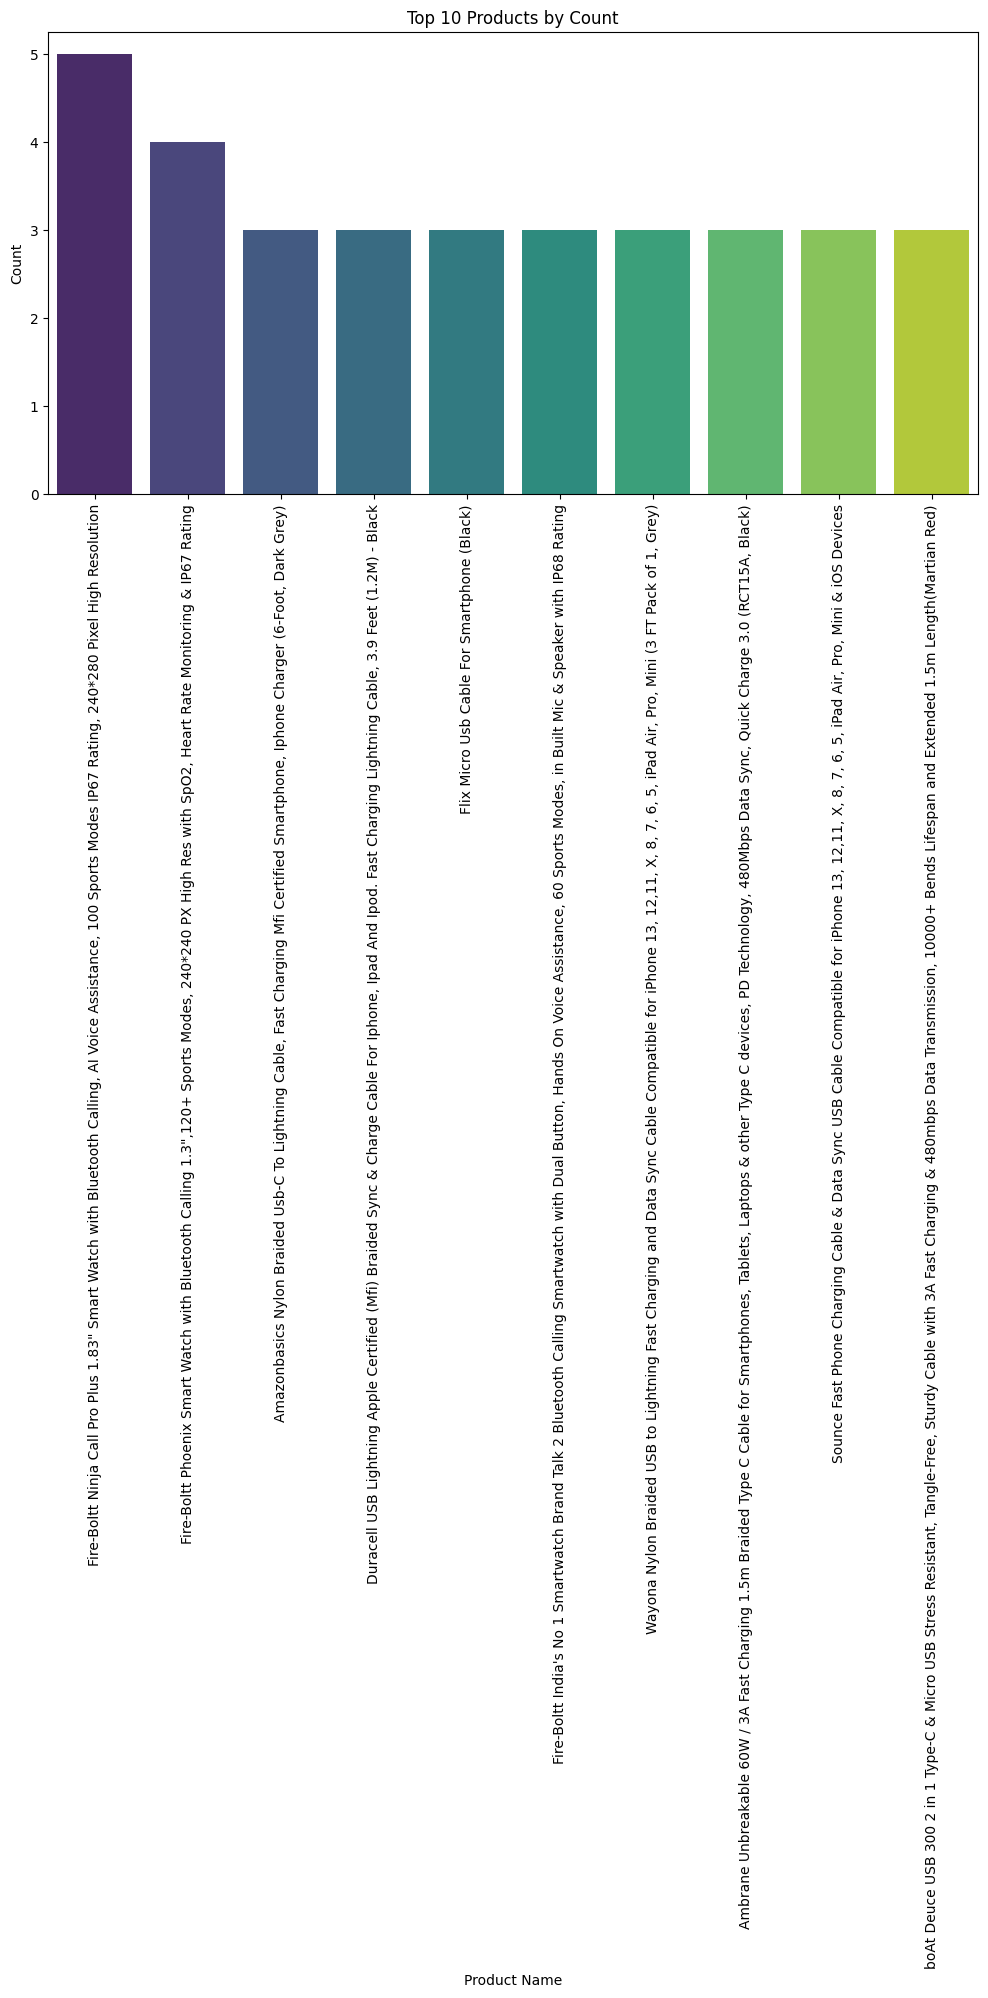

<ipython-input-44-f3e7c420f26a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='inferno')


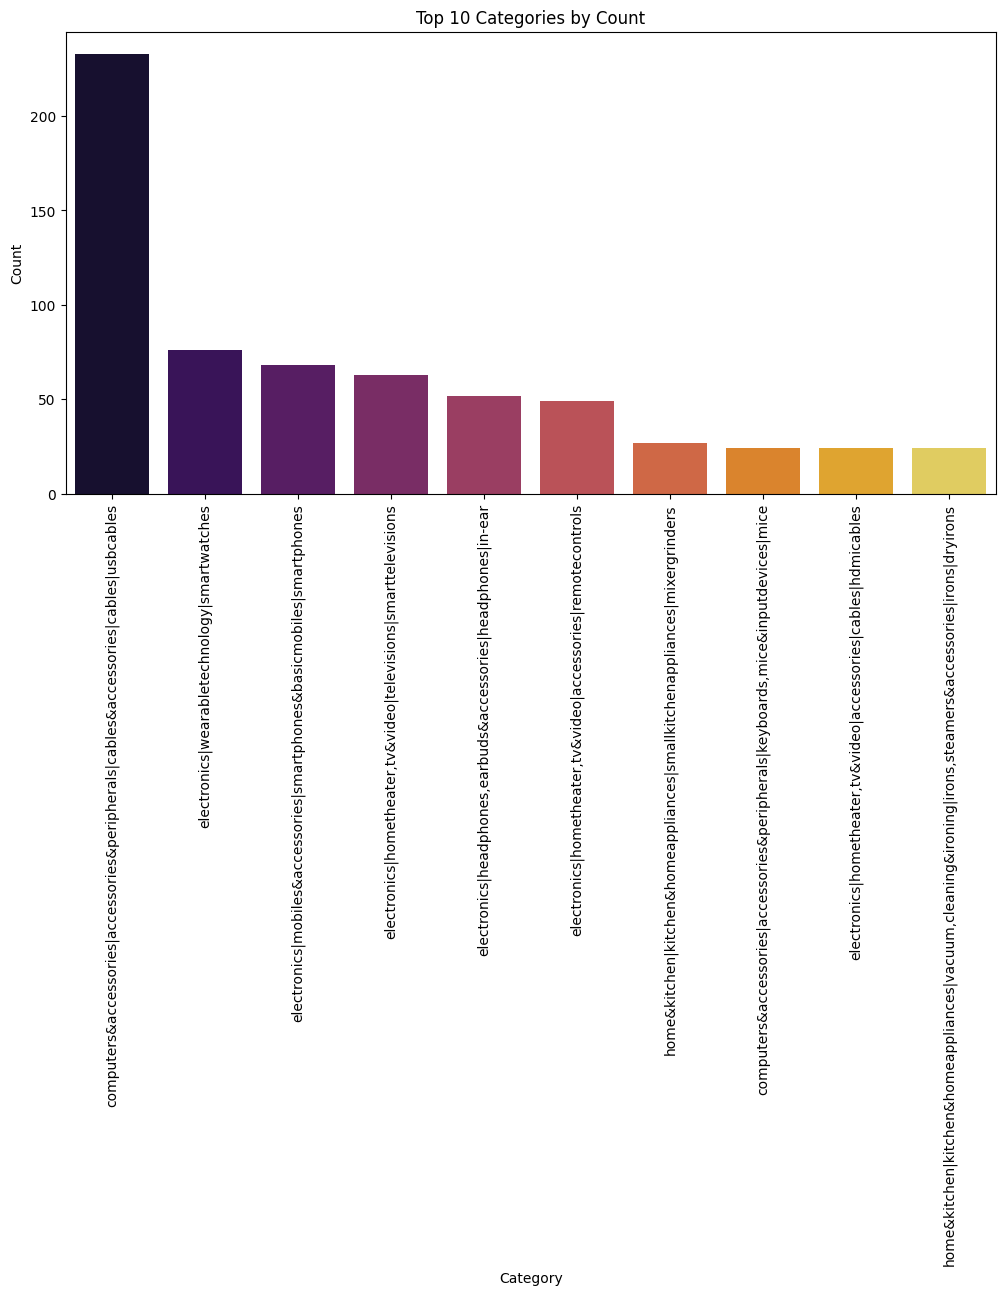

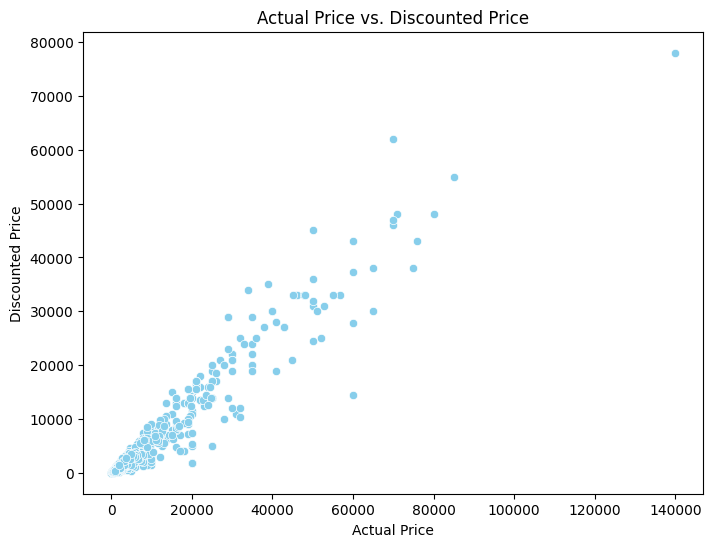

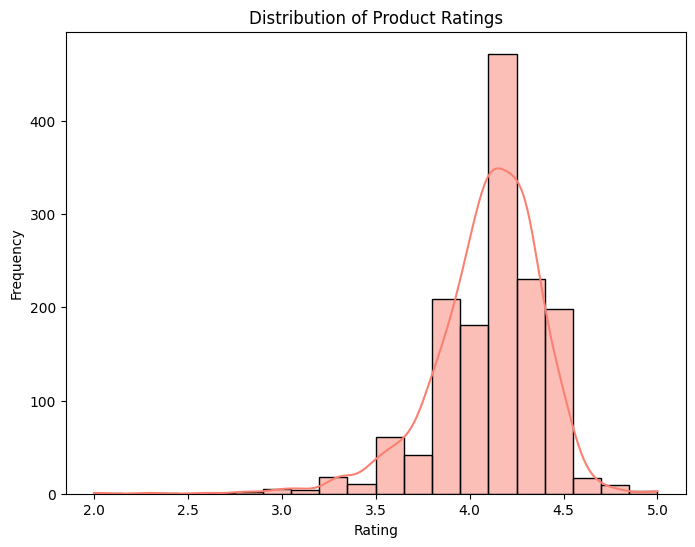

<ipython-input-44-f3e7c420f26a>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_stats_rating.index, y=category_stats_rating['rating'], palette='magma')


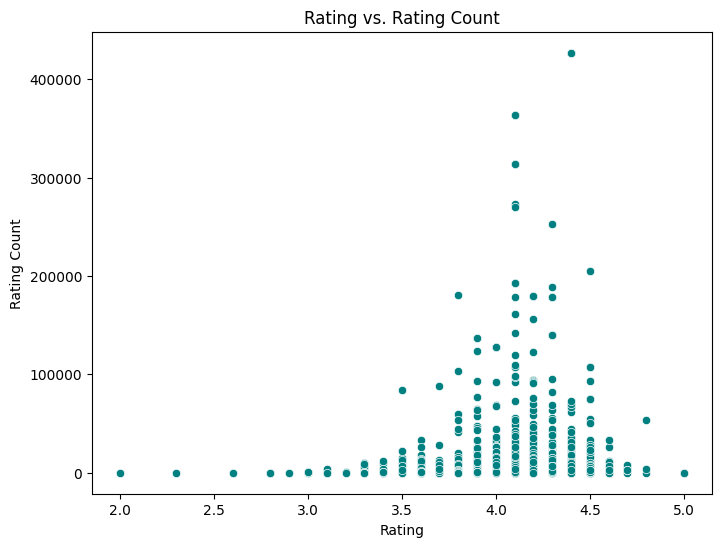

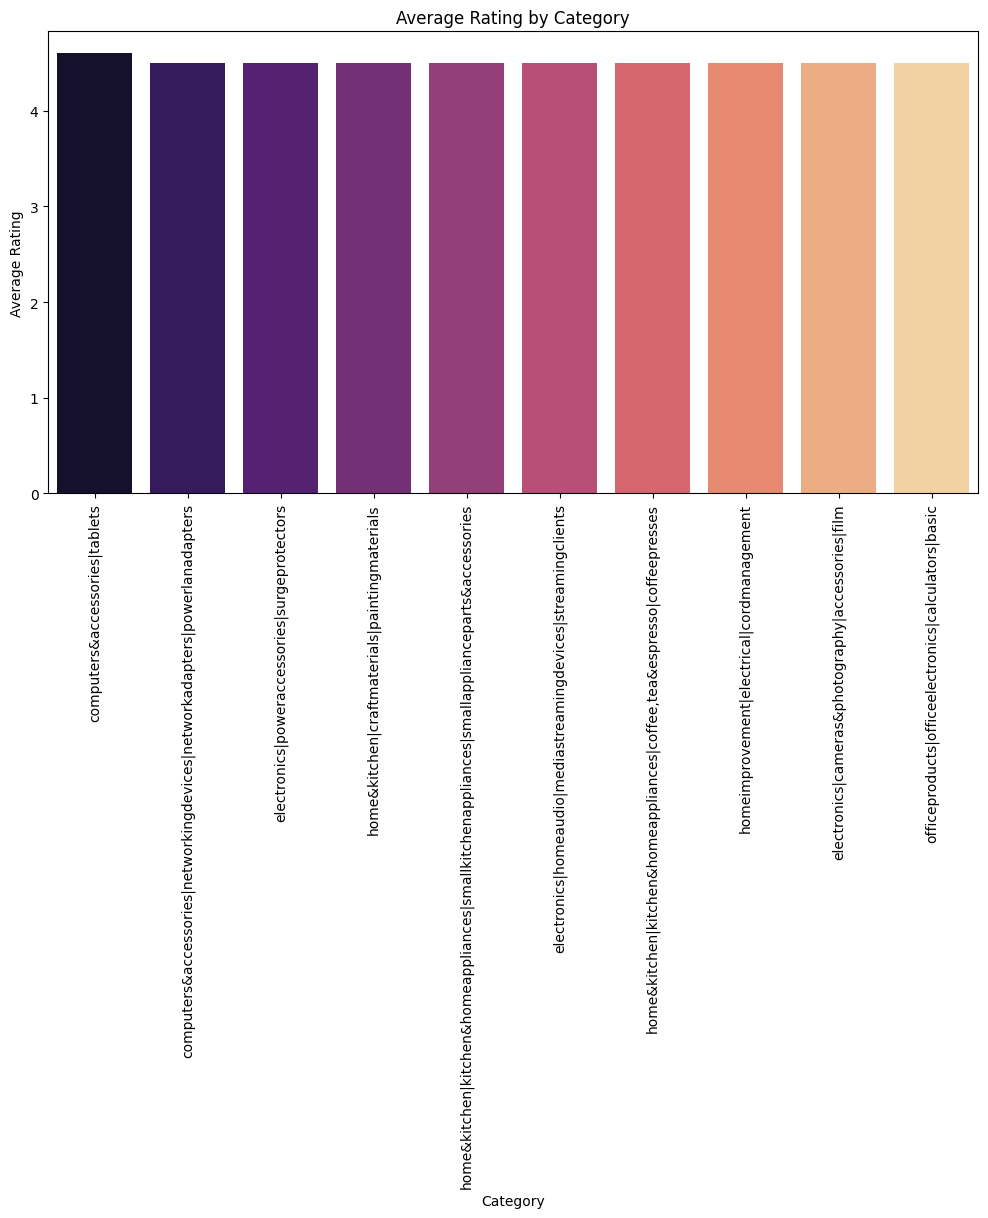

<ipython-input-44-f3e7c420f26a>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_stats_rating_count.index, y=category_stats_rating_count['rating_count'], palette='plasma')


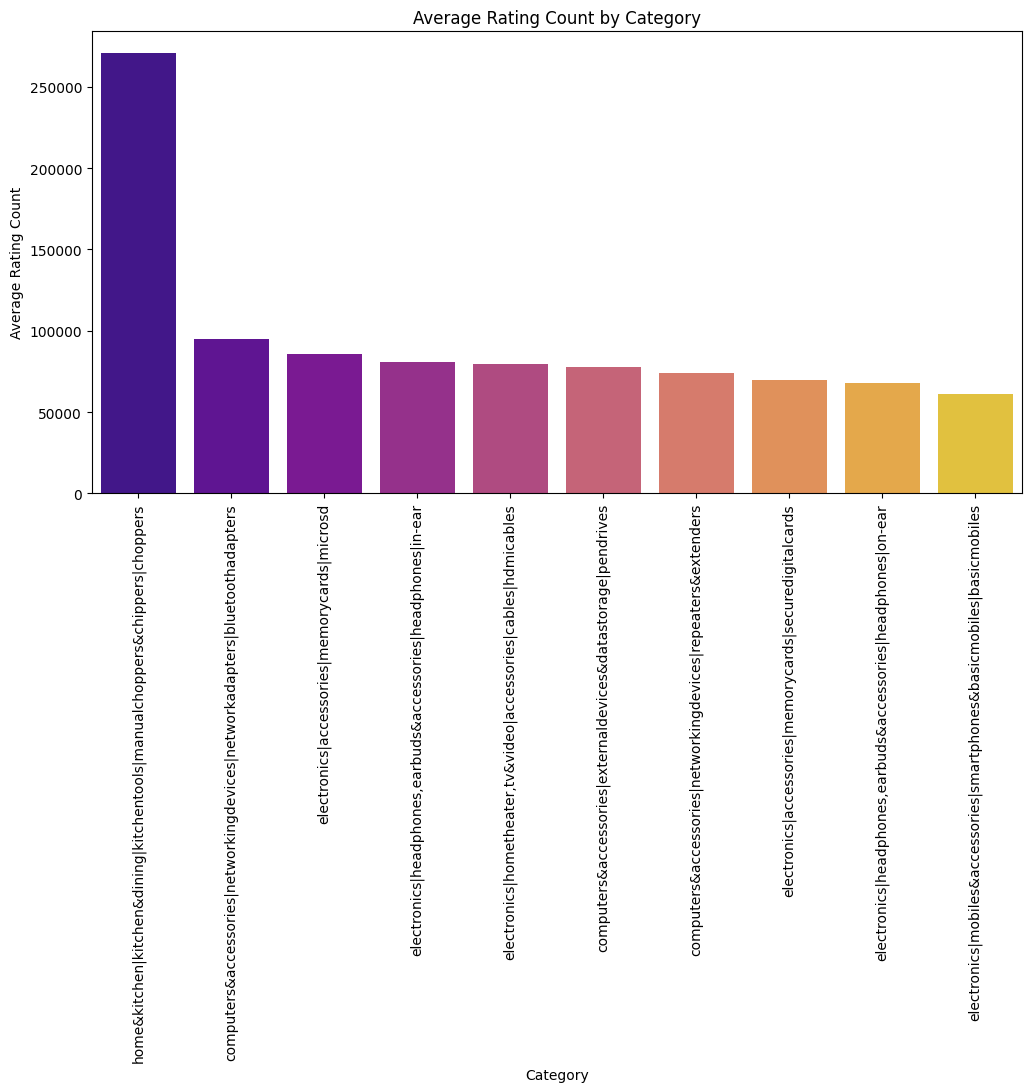

In [44]:
# Baplot for top 10 products
top_products = df['product_name'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values,  palette='viridis', legend='False')
plt.title('Top 10 Products by Count')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


# Barplot for top 10 categories
top_categories = df['category'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='inferno')
plt.title('Top 10 Categories by Count')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Scatterplot for dicounted_price and actual _price
plt.figure(figsize=(8,6))
sns.scatterplot(x='actual_price', y='discounted_price', data=df, color='skyblue')
plt.title('Actual Price vs. Discounted Price')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.show()

# Histogram for rating distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Scatterplot for rating and rating_count
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rating', y='rating_count', data=df, color='teal')
plt.title('Rating vs. Rating Count')
plt.xlabel('Rating')
plt.ylabel('Rating Count')


#Analyze and display the relationship between product category, rating, and rating_count
#Sort by average rating in descending ordera nd plot
category_stats_rating= category_stats.sort_values(by='rating', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_stats_rating.index, y=category_stats_rating['rating'], palette='magma')
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()


# Sort by average rating_count in descending order and plot
category_stats_rating_count = category_stats.sort_values(by= 'rating_count', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_stats_rating_count.index, y=category_stats_rating_count['rating_count'], palette='plasma')
plt.title('Average Rating Count by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating Count')
plt.xticks(rotation=90)
plt.show()















## Summary:

### Data Analysis Key Findings

*   The dataset contains 1465 rows and 16 columns.
*   After cleaning, the `discounted_price`, `actual_price`, `discount_percentage`, `rating`, and `rating_count` columns were converted to numeric types.
*   0 duplicate rows were found and removed.
*   The average discount percentage is approximately 47.69\%.
*   The average product rating is around 4.10.
*   The average rating count per product is about 18295.54.
*   The top category by product count is 'computers\&accessories|accessories\&peripherals|cables\&accessories|cables|usbcables'.
*   The distribution of ratings is skewed towards higher values, with most products having ratings between 3.8 and 4.3.
*   The product with the highest discount percentage (94\%) is 'rts [2 Pack] Mini USB C Type C Adapter Plug...'
*   The average rating count by category is 'Home&kitchen| kitchen&dining|kitchen&tools| manual choppers&chippers.
*   The average rating by category is computers&accessories| tablets.